# **Exploratory Data Analysis with pandas and seaborn**

### **Relevant Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

### Converting .csv data to pandas Dataframe

In [3]:
path = Path("C:/Users/joaop/Desktop/behaviour_analysis/data/personality_dataset.csv")

behavior_df = pd.read_csv(path)

behavior_df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


This behavior analysis dataset features key indicators of extroversion and introversion (see table section above), as well as labels with the known diagnosis.

Data import was made via the pathlib (using the Path class) and pandas modules. After creating the path to the ".csv" file containing the data in my computer, I used pandas to read the file and convert it to a DataFrame object.

### General statistics and verifying missing/inconsistent values

In [4]:
behavior_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [5]:
behavior_df.isna().sum().to_frame().set_axis(["Count of Null"], axis=1)


,Count of Null
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


## **Data Preprocessing**

### Isolating rows with at least 1 missing value

In [6]:
null_values = behavior_df[behavior_df.isnull().any(axis=1)]

null_values

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
33,8.0,Yes,3.0,3.0,NaN,2.0,0.0,Introvert
41,1.0,No,4.0,5.0,No,NaN,10.0,Extrovert
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
71,1.0,No,NaN,5.0,No,11.0,8.0,Extrovert
...,...,...,...,...,...,...,...,...
2882,1.0,NaN,9.0,3.0,No,7.0,6.0,Extrovert
2885,10.0,Yes,0.0,0.0,NaN,2.0,0.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert


This step isolates rows with missing values, showing there are 423 record with at least one column with missing information.

I did this to get a better picture of the amount and type of missing information, which would help me decide on the best technique to handle these missing values.

Ultimately, due to 423 records being a considerable percentage of the dataset (which is already quite small for training a ML model), I decided to impute missing values with the median.

### Separating Extroverts from Introverts

In [7]:
extrovert_df = behavior_df[behavior_df["Personality"] == "Extrovert"]

introvert_df = behavior_df[behavior_df["Personality"] == "Introvert"]

In [8]:
extrovert_df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert
10,3.0,No,9.0,6.0,No,15.0,5.0,Extrovert
12,3.0,No,6.0,7.0,No,14.0,10.0,Extrovert
13,3.0,No,6.0,4.0,No,10.0,7.0,Extrovert


In [9]:
introvert_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
11,10.0,Yes,3.0,1.0,Yes,4.0,0.0,Introvert
14,6.0,Yes,3.0,0.0,Yes,1.0,3.0,Introvert


I split the original dataframe to be able to calculate median values of the key indicators separately by personality type.

### Calculate median separately for introverts and extroverts

In [10]:
columns_to_fill = ["Time_spent_Alone", "Social_event_attendance", "Going_outside",
                   "Friends_circle_size", "Post_frequency"]

extrovert_median = extrovert_df[columns_to_fill].median()

introvert_median = introvert_df[columns_to_fill].median()

In [11]:
extrovert_median

Time_spent_Alone           2.0
Social_event_attendance    6.0
Going_outside              5.0
Friends_circle_size        9.0
Post_frequency             6.0
dtype: float64

### Imputing missing numerical values with median

In [12]:
extrovert_df = extrovert_df.fillna(extrovert_median)

extrovert_df.isna().sum()

Time_spent_Alone              0
Stage_fear                   42
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    18
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [13]:
introvert_df = introvert_df.fillna(introvert_median)

introvert_df.isna().sum()

Time_spent_Alone              0
Stage_fear                   31
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    34
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

### Imputing categorical (yes/no) data with most frequent value

In [14]:
complete_extrovert_df = extrovert_df.replace(to_replace=np.nan, value="No")

complete_extrovert_df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [15]:
complete_introvert_df = introvert_df.replace(to_replace=np.nan, value="Yes")

complete_introvert_df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

### Identifying and Removing Outliers in Introvert Dataframe

In [16]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']

#calculating z-score for introvert dataframe
z = np.abs(stats.zscore(complete_introvert_df[numerical_cols]))

#identificar outliers como z score > 3
outliers = complete_introvert_df[z > 3]

outliers.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
440,0.0,No,6.0,6.0,No,11.0,5.0,Introvert
440,0.0,No,6.0,6.0,No,11.0,5.0,Introvert
522,0.0,No,6.0,4.0,No,13.0,6.0,Introvert
533,2.0,No,7.0,4.0,No,9.0,5.0,Introvert
550,0.0,No,7.0,4.0,No,14.0,1.0,Introvert
550,0.0,No,7.0,4.0,No,14.0,1.0,Introvert
567,1.0,No,4.0,5.0,No,6.0,7.0,Introvert
571,2.0,No,8.0,4.0,No,10.0,4.0,Introvert
582,1.0,No,5.0,5.0,No,8.0,9.0,Introvert
720,3.0,No,4.0,4.0,No,14.0,7.0,Introvert


In [17]:
# replace outliers with median value
complete_introvert_df = complete_introvert_df.drop(outliers.index)

### Identifying and Removing Outliers in Extrovert Dataframe

In [18]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']

#calculating z-score for introvert dataframe
z = np.abs(stats.zscore(complete_extrovert_df[numerical_cols]))

#identificar outliers como z score > 3
outliers = complete_extrovert_df[z > 3]

outliers.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
558,11.0,Yes,1.0,1.0,Yes,3.0,0.0,Extrovert
689,9.0,Yes,2.0,2.0,Yes,1.0,2.0,Extrovert
802,10.0,Yes,3.0,2.0,Yes,3.0,1.0,Extrovert
871,11.0,Yes,2.0,0.0,Yes,3.0,2.0,Extrovert
872,11.0,Yes,0.0,1.0,Yes,3.0,0.0,Extrovert
977,11.0,Yes,0.0,0.0,Yes,0.0,0.0,Extrovert
1172,11.0,Yes,0.0,1.0,Yes,3.0,0.0,Extrovert
1272,9.0,Yes,1.0,2.0,Yes,0.0,2.0,Extrovert
1281,9.0,Yes,3.0,2.0,Yes,4.0,0.0,Extrovert
1344,11.0,Yes,2.0,1.0,Yes,3.0,1.0,Extrovert


In [19]:
# replace outliers with median value
complete_extrovert_df = complete_extrovert_df.drop(outliers.index)

In [20]:
complete_extrovert_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,5.0,No,7.0,7.0,Extrovert
...,...,...,...,...,...,...,...,...
2887,0.0,No,9.0,6.0,No,6.0,3.0,Extrovert
2894,0.0,No,9.0,3.0,No,12.0,6.0,Extrovert
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert


After I built one of the boxplots below there were lots of apparent outliers and the visualization did not seem to make sense. I wanted to check how many there were so that I could figure out how to deal with them.

I did this by checking the "z-score" of the elements in the numerical columns of the dataframe. The z-score basically tells you how many standard deviations away the element is from the mean. Since around 99.7% of values are located less than 3 standard deviations away from the mean, z-score values bigger than 3 indicate possible outliers.

By filtering only by values of z > 3, I found 183 records with possible outliers in the Introvert data frame and 73 in the Extrovert data frame.

Ultimately I decided to remove these records from the data frame by using the pandas ".drop()" method. After checking the box plot visualization below, I got a graph that made a lot more sense.

### Merging back both data frames

In [21]:
complete_behavior_df = pd.concat([complete_extrovert_df, complete_introvert_df])

complete_behavior_df = complete_behavior_df.reset_index(drop=True)

complete_behavior_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
2,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
3,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
4,4.0,No,9.0,5.0,No,7.0,7.0,Extrovert
...,...,...,...,...,...,...,...,...
2762,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2763,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2764,9.0,Yes,2.0,0.0,Yes,4.0,2.0,Introvert
2765,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


## Visualizing Introverts vs Extroverts Data

c:\Users\joaop\Desktop\behaviour_analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


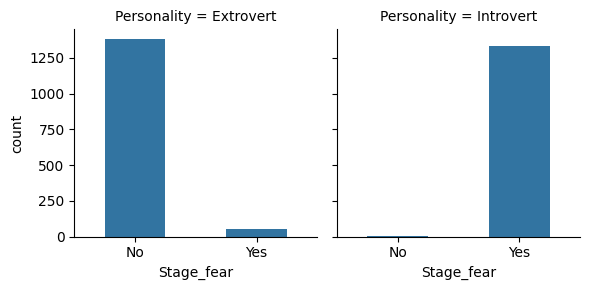

In [22]:
#iniciar uma grid com gráficos a corresponder ao tipo de personalidade
g = sns.FacetGrid(complete_behavior_df, col="Personality")

#fazer um countplot relativamente á presença ou ausência de stage_fear
g.map(sns.countplot, "Stage_fear", width=0.5)

c:\Users\joaop\Desktop\behaviour_analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


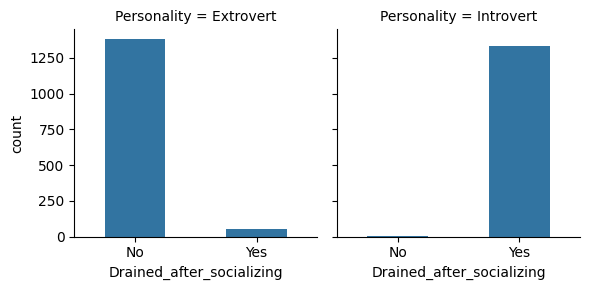

In [23]:
#mesmo tipo de grid e gráfico para "Drained after socializing"
g = sns.FacetGrid(complete_behavior_df, col="Personality")

g.map(sns.countplot, "Drained_after_socializing", width=0.5)

Text(0.5, 1.0, 'Time Spent Alone by Personality Type')

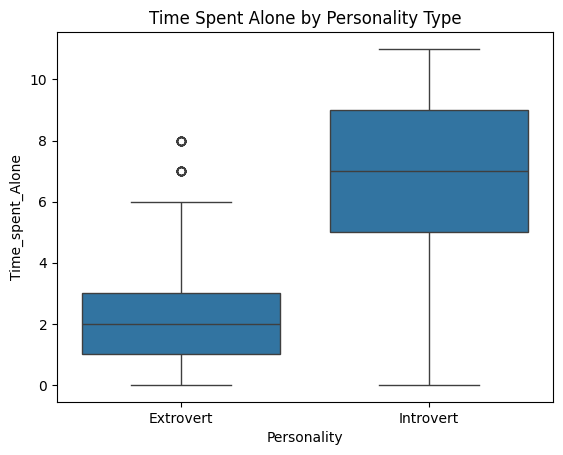

In [24]:
#boxplot para analisar tempo passado sozinho introverts vs extroverts
sns.boxplot(complete_behavior_df, x="Personality", y="Time_spent_Alone")
plt.title("Time Spent Alone by Personality Type")

Text(0.5, 1.0, 'Time Spent Alone by Personality Type')

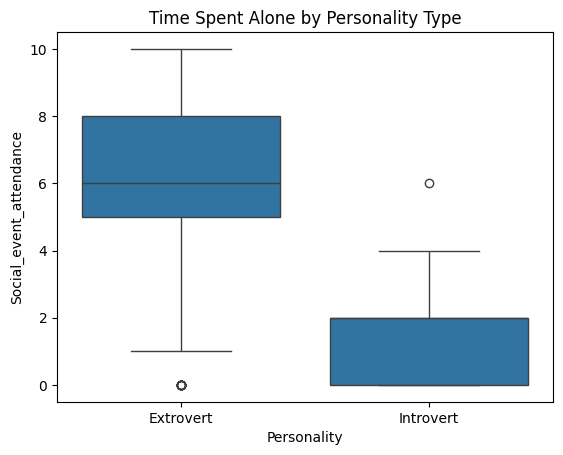

In [25]:
#boxplot para analisar a ida a eventos sociais - introverts vs extroverts
sns.boxplot(complete_behavior_df, x="Personality", y="Social_event_attendance")
plt.title("Time Spent Alone by Personality Type")

### Scaling Numerical Values with MinMaxScaler  

- All numerical values have similar scales, but I still decided to employ feature scaling to standardize the data for the model.
- Since I took care of outliers in the previous section, I decided to use the MinMaxScaler, which is simpler than the StandardScaler. This scaler converts the values into a 0-1 range.
- Naturally, this scaling was not applied to categorical features.

In [26]:
complete_behavior_df_num = complete_behavior_df.select_dtypes(include=[np.number])

complete_behavior_df_num

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,4.0,6.0,13.0,5.0
1,0.0,6.0,7.0,14.0,8.0
2,3.0,9.0,4.0,8.0,5.0
3,1.0,7.0,5.0,6.0,6.0
4,4.0,9.0,5.0,7.0,7.0
...,...,...,...,...,...
2762,6.0,3.0,1.0,5.0,1.0
2763,9.0,2.0,0.0,1.0,2.0
2764,9.0,2.0,0.0,4.0,2.0
2765,4.0,1.0,1.0,4.0,0.0


In [27]:
min_max_scaler = MinMaxScaler()

scaled_behavior_arr = min_max_scaler.fit_transform(complete_behavior_df_num)

scaled_behavior_arr

array([[0.36363636, 0.4       , 0.85714286, 0.86666667, 0.5       ],
       [0.        , 0.6       , 1.        , 0.93333333, 0.8       ],
       [0.27272727, 0.9       , 0.57142857, 0.53333333, 0.5       ],
       ...,
       [0.81818182, 0.2       , 0.        , 0.26666667, 0.2       ],
       [0.36363636, 0.1       , 0.14285714, 0.26666667, 0.        ],
       [1.        , 0.1       , 0.14285714, 0.13333333, 0.        ]],
      shape=(2767, 5))

In [28]:
#convert numpy array back to df with original indexes
scaled_behavior_df = pd.DataFrame(scaled_behavior_arr, columns=complete_behavior_df_num.columns)

scaled_behavior_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,0.363636,0.4,0.857143,0.866667,0.5
1,0.000000,0.6,1.000000,0.933333,0.8
2,0.272727,0.9,0.571429,0.533333,0.5
3,0.090909,0.7,0.714286,0.400000,0.6
4,0.363636,0.9,0.714286,0.466667,0.7
...,...,...,...,...,...
2762,0.545455,0.3,0.142857,0.333333,0.1
2763,0.818182,0.2,0.000000,0.066667,0.2
2764,0.818182,0.2,0.000000,0.266667,0.2
2765,0.363636,0.1,0.142857,0.266667,0.0


In [29]:
#get columns with "object" type data
complete_behavior_df_obj = complete_behavior_df.select_dtypes(exclude=np.number)

complete_behavior_df_obj.head(10)

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,No,No,Extrovert
2,No,No,Extrovert
3,No,No,Extrovert
4,No,No,Extrovert
5,No,No,Extrovert
6,No,No,Extrovert
7,No,No,Extrovert
8,No,No,Extrovert
9,No,No,Extrovert


In [30]:
complete_behavior_df = pd.concat([scaled_behavior_df, complete_behavior_df_obj], axis=1)

complete_behavior_df.head(10)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,0.363636,0.4,0.857143,0.866667,0.5,No,No,Extrovert
1,0.000000,0.6,1.000000,0.933333,0.8,No,No,Extrovert
2,0.272727,0.9,0.571429,0.533333,0.5,No,No,Extrovert
3,0.090909,0.7,0.714286,0.400000,0.6,No,No,Extrovert
4,0.363636,0.9,0.714286,0.466667,0.7,No,No,Extrovert
5,0.181818,0.8,0.571429,0.466667,0.8,No,No,Extrovert
6,0.000000,0.8,0.857143,0.866667,0.8,No,No,Extrovert
7,0.272727,0.9,0.857143,1.000000,0.5,No,No,Extrovert
8,0.272727,0.6,1.000000,0.933333,1.0,No,No,Extrovert
9,0.272727,0.6,0.571429,0.666667,0.7,No,No,Extrovert


### Converting categorical ("Yes/No") attributes to "1/0", respectively.

In [31]:
complete_behavior_df["Stage_fear"] = complete_behavior_df["Stage_fear"].map({"Yes": 1, "No": 0})
complete_behavior_df["Drained_after_socializing"] = complete_behavior_df["Drained_after_socializing"].map({"Yes": 1, "No": 0})

In [32]:
complete_behavior_df.head(10)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,0.363636,0.4,0.857143,0.866667,0.5,0,0,Extrovert
1,0.000000,0.6,1.000000,0.933333,0.8,0,0,Extrovert
2,0.272727,0.9,0.571429,0.533333,0.5,0,0,Extrovert
3,0.090909,0.7,0.714286,0.400000,0.6,0,0,Extrovert
4,0.363636,0.9,0.714286,0.466667,0.7,0,0,Extrovert
5,0.181818,0.8,0.571429,0.466667,0.8,0,0,Extrovert
6,0.000000,0.8,0.857143,0.866667,0.8,0,0,Extrovert
7,0.272727,0.9,0.857143,1.000000,0.5,0,0,Extrovert
8,0.272727,0.6,1.000000,0.933333,1.0,0,0,Extrovert
9,0.272727,0.6,0.571429,0.666667,0.7,0,0,Extrovert


In [33]:
complete_behavior_df.dtypes

Time_spent_Alone             float64
Social_event_attendance      float64
Going_outside                float64
Friends_circle_size          float64
Post_frequency               float64
Stage_fear                     int64
Drained_after_socializing      int64
Personality                   object
dtype: object

### Labeling Target Variable

In [34]:
label = LabelEncoder()

complete_behavior_df["Personality"] = label.fit_transform(complete_behavior_df["Personality"])

In [35]:
complete_behavior_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,0.363636,0.4,0.857143,0.866667,0.5,0,0,0
1,0.000000,0.6,1.000000,0.933333,0.8,0,0,0
2,0.272727,0.9,0.571429,0.533333,0.5,0,0,0
3,0.090909,0.7,0.714286,0.400000,0.6,0,0,0
4,0.363636,0.9,0.714286,0.466667,0.7,0,0,0
...,...,...,...,...,...,...,...,...
2762,0.545455,0.3,0.142857,0.333333,0.1,1,1,1
2763,0.818182,0.2,0.000000,0.066667,0.2,1,1,1
2764,0.818182,0.2,0.000000,0.266667,0.2,1,1,1
2765,0.363636,0.1,0.142857,0.266667,0.0,1,1,1


Note that I attributed the positive case (1) to the "Introvert" personality type.

In [36]:
complete_behavior_df.dtypes

Time_spent_Alone             float64
Social_event_attendance      float64
Going_outside                float64
Friends_circle_size          float64
Post_frequency               float64
Stage_fear                     int64
Drained_after_socializing      int64
Personality                    int64
dtype: object

### Select and Train Model  
- Since this is a binary classification task, I decided to implement and evaluate a logistic regression model

 ##### Starting with Logistic Regression (simpler and less prone to overfitting on this small dataset)

**Separating the features from our labels**

In [37]:
feature_columns = ["Time_spent_Alone", "Social_event_attendance", "Going_outside",
                    "Friends_circle_size", "Post_frequency", "Stage_fear", "Drained_after_socializing"]

X = complete_behavior_df[feature_columns]
y = complete_behavior_df["Personality"]

**Using the "train_test_split()" function from sci-kit learn to split the dataset into a training set and a test set**

In [38]:
#determine train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I performed an 80-20 split since the dataset is quite small for a common ML task.

The random splitting is assured by the train_test_split function, which allows us to define a random state for random seed generation.

There can be some sampling bias in this dataset due to the nature of the random sampling performed by train_test_split() and the size of our dataset. In bigger datasets, it is more likely for the sample to be representative of the whole population, while in a smaller dataset (like in our case - about 2.5k records after removal of outliers) there is a higher chance of having a skewed test set that overrepresents or underrepresents part of the population.

In [39]:
#initiate Logistic Regression model and make prediction
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Making a coefficient Data Frame to measure the significance of each feature in behaviour diagnosis**

In [40]:
logreg.coef_

array([[ 1.70859038, -1.25243247, -1.02398675,  0.01784304, -1.18085493,
         3.10695898,  3.10695898]])

In [41]:
coefficient_df = pd.DataFrame(data=logreg.coef_, columns = feature_columns)

coefficient_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,1.70859,-1.252432,-1.023987,0.017843,-1.180855,3.106959,3.106959


As we can see in the coefficient data frame above, the biggest indicators of introversion are the presence of stage fright and feeling drained after socializing. Looking at it from a human prespective, it makes sense for these factors to be the most relevant for an Introverted personality type. Introverted people tend to have severe stage fright and feel very drained after socializing, while extroverted people feel the opposite. Introverted people get worn out with too much interaction, while extroverted people recharge with social interaction.

Time spent alone is another strong indicator of extroversion that is tied closely to the previous two aspects, but it is not as strong of an indicator as them. There can be cases (although not many) where introverts spend time in small groups, doing activities that they love, for example.

On the other hand, an increase in frequency of social event attendance, going outside and social media posting are indicators of extroversion (negative coefficients mean that increases in these features make it less likely to predict the positive case - introversion (1), and more likely to predict the negative case - extroversion (0).) Even though introverted people have a tendency to spend more time online, they tend to avoid attracting attention to themselves by posting on social media.

The coefficient for friends circle size is very close to 0, meaning that increases or decreases in the size of one's friend circle aren't key indicators in diagnosing someone with an introverted or extroverted personality type. It is practically negligible. The feature actually shows a very marginal increase in likelyhood of introversion as friend circle size increases, which seems to contradict what is expected. There is a possiblity that introverts counted their online friends, which would balance out with the size of real life friend circles of extroverts.

In [42]:
y_pred = logreg.predict(X_test)

In [43]:
y_train

2124    1
2715    1
2231    1
261     0
2059    1
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: Personality, Length: 2213, dtype: int64

In [44]:
#calculate mean squared error
log_rmse = mean_squared_error(y_test, y_pred)

print(f"RMSE = {log_rmse:.5f}")

RMSE = 0.02527


The root mean squared error (RMSE) obtained for the model is approximately 0.02527. This metric evaluates the accuracy of the model by measuring the discrepancy between the predicted values and the actual values. In the case of our model this value is extremely low, which is a positive indicator of model accuracy.

In [45]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.47%


Model accuracy score measures the percentage of cases predicted correctly by summing both the true posisite and true negative cases and dividing this sum by the sample size. Once again, an accuracy measure of 97.47% is really high, which means that our model predicted almost all cases.

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       301
           1       0.95      1.00      0.97       253

    accuracy                           0.97       554
   macro avg       0.97      0.98      0.97       554
weighted avg       0.98      0.97      0.97       554



In the classification report we can see some key performance metrics. The model's precision, as well as the recall was really high, which is reflected in the f1-score. In the "support" column we see that our test set consisted of 301 extrovert and 253 introvert records. There is a slight imbalance in the sampling of the test set, as we should aim to have roughly the same number of both classes represented in our test set.

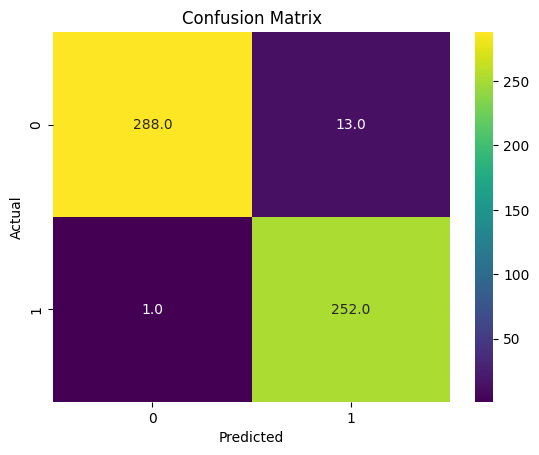

In [47]:
#make confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt=".1f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix above shows the number of correct and incorrect predictions.

The top left square measures the true negatives (extroverts), while the bottom right square measures the true positives (introverts).
The top right square measures the false positives, that is, the model predicted these records to be introverts when they were actually extroverts.
The bottom left square measures the false negatives, that is, the model predicted these records to be extroverts when they were actually introverts.

There are more false positives than false negatives with this model, which means our model has more difficulty predicting real introverts. This may be due to the data quality issues, as during data preprocessing and making of visualizations I noticed that some features in Introverts exhibit some extreme values uncharacteristic of this personality type. For example, in the box plot relative to "Time Spent Alone", the graph has some data points that show Introverts who spend little to no time alone, which does not make too much sense. On the other hand, the distribution of values in the Extrovert box plot is much more natural and characteristic of this personality type, even if there are some extreme values as well.

### Guardar modelo em ficheiro .pkl (pickle)

In [48]:
import pickle

model_pkl_file = "personality_predictor_model.pkl"

with open(model_pkl_file, "wb") as file:
    pickle.dump(logreg, file)